# Solución utilizando un elemento cuadrático

Solución del problema con los siguientes valores:

$$ L = 3\,m $$

$$ K = 50\,\left(\frac {W} {m\cdot K}\right) $$

$$ q = 25\,\frac{W}{m^2} $$

$$ Q = 40\,\frac{W}{m^3} $$

$$ T_L = 300\,K $$

Importamos la librería `sp` y la función para imprimir las ecuaciones.

In [1]:
import sympy as sp
from IPython.display import display as pp

Declaramos los símbolos que utilizaremos.

In [2]:
L, x, q, qL = sp.symbols('L, x, q, q_L')
T_1, T_2, T_3 = sp.symbols('T_1, T_2, T_3')

Declaramos el vector de las temperaturas en los nodos.

In [3]:
T = sp.Matrix([T_1, T_2, T_3])
pp(T)

Matrix([
[T_1],
[T_2],
[T_3]])

Declaramos las funciones de forma y las almacenamos en un vector $VN$.

In [4]:
N_1 = 1 - 3*x/L + 2*(x/L)**2
N_2 = 4*x/L -4*(x/L)**2
N_3 = - x/L + 2*(x/L)**2

VN = sp.Matrix([N_1, N_2, N_3])
pp(VN)

Matrix([
[1 - 3*x/L + 2*x**2/L**2],
[    4*x/L - 4*x**2/L**2],
[     -x/L + 2*x**2/L**2]])

Para verificar las funciones las graficamos substituyendo $L = 3$ (el dato del problema).

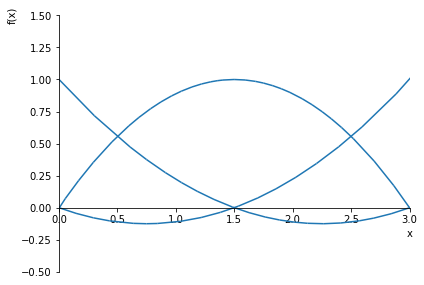

In [5]:
graph = sp.plot(N_1.subs(L,3), N_2.subs(L,3), N_3.subs(L,3), xlim=[0,3],ylim=[-0.5,1.5])

Calculamos las deriviadas de las tres funciones de forma y las almacenamos en un vector.

In [6]:
dN_1 = sp.diff(N_1,x).expand()
dN_2 = sp.diff(N_2,x).expand()
dN_3 = sp.diff(N_3,x).expand()

VdN = sp.Matrix([dN_1, dN_2, dN_3])
pp(VdN)

Matrix([
[-3/L + 4*x/L**2],
[ 4/L - 8*x/L**2],
[-1/L + 4*x/L**2]])

Multiplicamos el vector de las derivadas por si mismo para construir una matriz.

In [7]:
MdN = VdN * VdN.T
pp(MdN)

Matrix([
[               (-3/L + 4*x/L**2)**2, (-3/L + 4*x/L**2)*(4/L - 8*x/L**2), (-3/L + 4*x/L**2)*(-1/L + 4*x/L**2)],
[ (-3/L + 4*x/L**2)*(4/L - 8*x/L**2),                (4/L - 8*x/L**2)**2,  (-1/L + 4*x/L**2)*(4/L - 8*x/L**2)],
[(-3/L + 4*x/L**2)*(-1/L + 4*x/L**2), (-1/L + 4*x/L**2)*(4/L - 8*x/L**2),                (-1/L + 4*x/L**2)**2]])

Integramos la matriz con respecto a $x$. En este caso, para demostrar los pasos, se utiliza la integral indefinida.

In [8]:
integral = sp.integrate(MdN, x)
pp(integral)

Matrix([
[  9*x/L**2 - 12*x**2/L**3 + 16*x**3/(3*L**4), -12*x/L**2 + 20*x**2/L**3 - 32*x**3/(3*L**4),   3*x/L**2 - 8*x**2/L**3 + 16*x**3/(3*L**4)],
[-12*x/L**2 + 20*x**2/L**3 - 32*x**3/(3*L**4),  16*x/L**2 - 32*x**2/L**3 + 64*x**3/(3*L**4), -4*x/L**2 + 12*x**2/L**3 - 32*x**3/(3*L**4)],
[   3*x/L**2 - 8*x**2/L**3 + 16*x**3/(3*L**4),  -4*x/L**2 + 12*x**2/L**3 - 32*x**3/(3*L**4),     x/L**2 - 4*x**2/L**3 + 16*x**3/(3*L**4)]])

Substituimos los límites de integración y multiplicamos por $k = 50$ (según los datos del problema).

In [9]:
K = 50 * integral.subs({x:L}).subs({L:3})
pp(K)

Matrix([
[ 350/9, -400/9,   50/9],
[-400/9,  800/9, -400/9],
[  50/9, -400/9,  350/9]])

Integramos el vector de las funciones de forma $VN$ y, para conformar el vector de generación, lo multiplicamos por $Q = 40$.

In [10]:
FQ = 40 * sp.integrate(VN, x).subs({x:L}).subs({L:3})
pp(FQ)

Matrix([
[20],
[80],
[20]])

En este caso conocemos la $T_3 = 300$, pero desconocemos el flujo a la salida. Podemos incluirlo como incógnita $q_L$ en el vector de flujo. Incluimos en este mismo vector el flujo $q = 25$ que es un dato del problema.

In [11]:
Fq = sp.Matrix([25,0,-qL])
pp(Fq)

Matrix([
[  25],
[   0],
[-q_L]])

Realizamos la operación $KT = F_Q + F_q$ para obtener el sistema de ecuaciones, substituyendo la temperatura conocida $T_3 = 300$.

In [12]:
ecuaciones = (K * T - FQ - Fq).subs(T_3,300)
pp(ecuaciones)

Matrix([
[      350*T_1/9 - 400*T_2/9 + 4865/3],
[    -400*T_1/9 + 800*T_2/9 - 40240/3],
[50*T_1/9 - 400*T_2/9 + q_L + 34940/3]])

Resolvemos el sistema de ecuaciones.

In [13]:
solucion = sp.solve(ecuaciones)
pp(solucion)

{T_1: 3051/10, T_2: 6069/20, q_L: 145}

Para graficar los resultados construimos un vector con los valores de $T$ obtenidos.

In [14]:
VTsol = sp.Matrix([solucion[T_1], solucion[T_2], 300])
pp(VTsol)

Matrix([
[3051/10],
[6069/20],
[    300]])

Sabemos que la solución está formada por $\sum T_i \cdot N_i$ lo que corresponde a un producto punto.

In [15]:
T_solucion = VTsol.dot(VN).subs(L,3)
pp(T_solucion)

-2*x**2/5 - x/2 + 3051/10

Finalmente la graficamos.

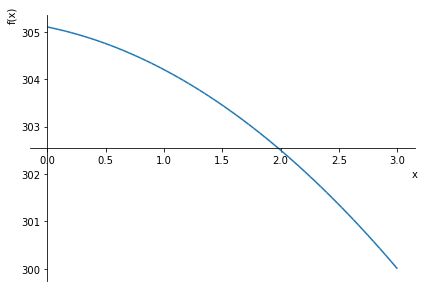

In [16]:
sp.plot(T_solucion,(x,0,3))

__Ejercicio:__

Modificar el código para resolver el problema utilizando, en lugar de las funciones cuadráticas, las siguientes funciones cúbicas. __Nota__: será necesario cambiar la posición de los nodos de $(0, \frac{L}{2}, L)$ a $(0, \frac{L}{3},\frac{2L}{3}, L)$

$$N_1^{(e)}(x) = \left(1 - \dfrac {3x} {h^{(e)}} \right) \left(1 - \dfrac {3x} {2h^{(e)}} \right) \left(1 - \dfrac {x} {h^{(e)}} \right)$$

$$N_2^{(e)}(x) = \dfrac {9x} {h^{(e)}}  \left(1 - \dfrac {3x} {2h^{(e)}} \right) \left(1 - \dfrac {x} {h^{(e)}} \right)$$

$$N_3^{(e)}(x) = - \dfrac {9x} {2h^{(e)}}  \left(1 - \dfrac {3x} {h^{(e)}} \right) \left(1 - \dfrac {x} {h^{(e)}} \right)$$

$$N_4^{(e)}(x) = \dfrac {x} {h^{(e)}}  \left(1 - \dfrac {3x} {h^{(e)}} \right) \left(1 - \dfrac {3x} {2h^{(e)}} \right)$$